# 3.4 Training, Validation and Test Split in PyTorch

Data split to: 
    
    Training Data: get Model Parameters (weight and bias) and Hyperparameters (learning rate and batch-size)
    
    Validation Data: determing the parameter, calculate the Cost
    
    Test Data

## Preparation

In [1]:
# Import libraries we need for this lab, and set the random seed

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

## Make Some Data

In [2]:
# Create Data class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            
            #outliers 
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass
      
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [3]:
# Create training dataset and validation dataset

train_data = Data()
val_data = Data(train = False)

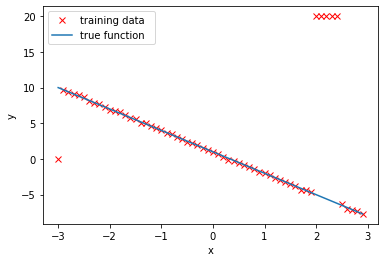

In [4]:
# Plot out training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Create a Linear Regression Object, Data Loader, and Criterion Function

In [17]:
import torch.nn as nn

class LR(nn.Module):
    # Constructor
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction Function    
    def forward(self, x):
        out = self.linear(x)
        return out

In [18]:
# Create MSELoss function and DataLoader
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size=1)

## Different learning rates and Data Structures to Store results for different Hyperparameters

In [22]:
# create learning Rate list, error list and MODEL list (epochs = 10)

epochs = 10
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
validation_error = torch.zeros(len(learning_rates))
train_error = torch.zeros(len(learning_rates))

MODELS = []

## Train different models for different Hyperparameters

In [23]:
# Define the train model function and train the model
def train_model_with_lr(iter, lr_list):
    for i, learning_rate in enumerate(lr_list):
        model = LR(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = learning_rate)
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                
                optimizer.zero_grad()
                
                loss.backward()
                optimizer.step()
        
        # Train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y) 
        train_error[i] = train_loss.item()
        
        # Validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        
        MODELS.append(model)

In [24]:
train_model_with_lr(10, learning_rates)

## View the Results

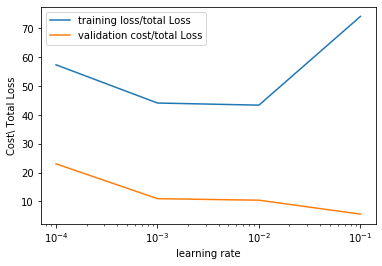

In [25]:
plt.semilogx(np.array(learning_rates), train_error.numpy(), 
             label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), 
             label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

In [37]:
good_model = MODELS[2]
Yhat = []
Y = []
for x, y in trainloader:
    Yhat.append(good_model(x).detach().numpy())
    Y.append(y.detach().numpy())


[array([[6.579915]], dtype=float32),
 array([[6.4460998]], dtype=float32),
 array([[6.3122845]], dtype=float32),
 array([[6.1784687]], dtype=float32),
 array([[6.0446534]], dtype=float32),
 array([[5.910838]], dtype=float32),
 array([[5.7770233]], dtype=float32),
 array([[5.6432076]], dtype=float32),
 array([[5.5093923]], dtype=float32),
 array([[5.375577]], dtype=float32),
 array([[5.241761]], dtype=float32),
 array([[5.1079464]], dtype=float32),
 array([[4.9741306]], dtype=float32),
 array([[4.8403153]], dtype=float32),
 array([[4.7065]], dtype=float32),
 array([[4.5726843]], dtype=float32),
 array([[4.4388695]], dtype=float32),
 array([[4.3050537]], dtype=float32),
 array([[4.171239]], dtype=float32),
 array([[4.037423]], dtype=float32),
 array([[3.9036078]], dtype=float32),
 array([[3.7697926]], dtype=float32),
 array([[3.6359773]], dtype=float32),
 array([[3.5021617]], dtype=float32),
 array([[3.3683465]], dtype=float32),
 array([[3.234531]], dtype=float32),
 array([[3.1007156]], 

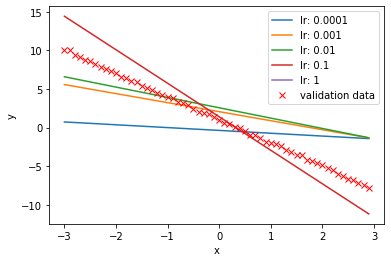

In [31]:
# Plot the predictions
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), 
             label='lr: ' + str(learning_rate))
plt.plot(val_data.x.numpy(), val_data.y.numpy(), 'xr', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()